# K-Means
#### Rohith Ramakrishnan - CB.EN.U4AIE19052
<hr style="border:1px solid gray"> </hr>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from IPython import display
import pylab as pl
import time as t

Generating 2 sets of Random Data: 

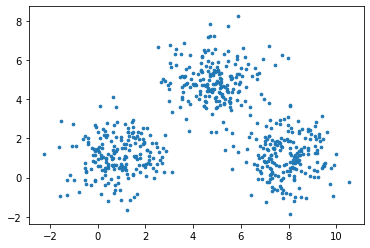

In [40]:
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

# Generate random data and center it to the three centers
data_1 = np.random.randn(200,2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7)
plt.show()

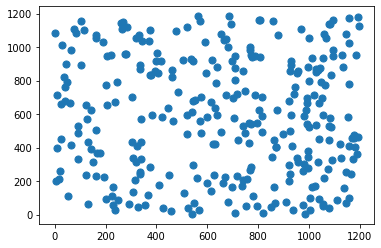

In [43]:
#Random Data
X = np.array(np.random.randint(1200,size=(300,2)))
plt.scatter(X[:,0], X[:,1], s=50)
plt.show()

In [37]:
class kmeans:
    
    def __init__(self, X, k , maxit):
        self.k = k
        self.X = X
        self.maxit = maxit
    
    def distance(self,x, y):
        s=0
        for i in range(0,len(x)):
            s += (x[i] - y[i])**2
        return math.sqrt(s)
    
    def fit(self):
        k=self.k
        X=self.X
        #Using the random to select random points in the Data array 
        self.cent=random.sample(list(X),k)
        #Printing the randomly chosen points:
        print("Centers Initial:")
        for a in self.cent:
            print(a)
        print("")
        
        loss=0
        for s in range(self.maxit):
            D = np.zeros((k,len(X)))
            for i in range(0,k):
                for a in range(0,len(X)):
                    D[i][a] = self.distance(self.cent[i],X[a])
            L = np.argmin(D,axis=0)
            for v in range(0,k):
                i = [index for index, element in enumerate(L) if element == v]
                self.cent[v]=X[i].mean(axis=0)   

        S=[[] for a in range(k)]
        for v in range(len(L)):
            S[L[v]].append(X[v].tolist())
            for i in range(k):
                for r in S[L[v]]:
                    loss+=self.distance(self.cent[i],r)**2
                    
        print("Final Centers:")
        for a in self.cent:
            print(a)
        print("")
        self.S = np.array(S)
        
    
    def plot_s(self):
        for i in range(0,self.k):
            o=np.array(self.S[i])
            l="Classification-"+str(i+1)
            plt.scatter(o[:,0], o[:,1], s=25,label=l)
        c = np.array(self.cent)
        plt.scatter(c[:,0], c[:,1],marker="^", s=100,label="Centeroids")
        plt.legend()
        plt.show() 

In [38]:
a = kmeans(data,3,300)
a.fit()

Centers Initial:
[4.40551113 2.75790084]
[7.46651299 0.94351681]
[5.34445969 4.42199031]

Final Centers:
[1.14222345 1.05060934]
[8.03571854 0.97430935]
[4.88207998 4.89693556]



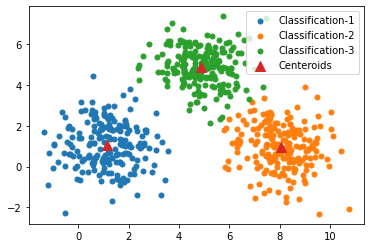

In [39]:
a.plot_s()

In [44]:
b = kmeans(X,3,300)
b.fit()

Centers Initial:
[541 610]
[1083  578]
[ 332 1070]

Final Centers:
[388.74025974 238.63636364]
[991.01574803 552.07086614]
[421.34375    907.26041667]



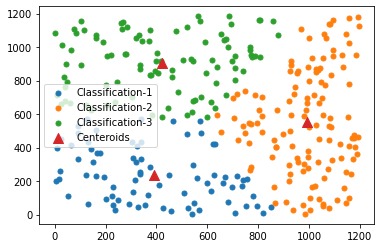

In [45]:
b.plot_s()